## Part I
### Exercise 1
1. Use two maps of points.

2. Compute the distance matrix for both maps.

3. Select one row of the distance matrix, and plot the two points with the minimal distance on top of the country of your choosing.

In [19]:
#from  fiona import listlayers
#import os

#turkeyMaps=os.path.join('maps','turkeyMaps_5636_all.gpkg')

#layers in maps
#listlayers(turkeyMaps)

import pandas as gpd

turkeyMaps='https://github.com/1IAS21-Tarea/FINAL/raw/main/maps/turkeyMaps_5636_all.gpkg'
listlayers(turkeyMaps)

['airports',
 'states',
 'municipalities',
 'country',
 'cities',
 'rivers',
 'border']

In [20]:
# reading in the data:
import os
import geopandas as gpd

states=gpd.read_file(turkeyMaps,layer='states')
municipalities=gpd.read_file(turkeyMaps,layer='municipalities')
airports=gpd.read_file(turkeyMaps,layer='airports')
rivers=gpd.read_file(turkeyMaps,layer='rivers')
border=gpd.read_file(turkeyMaps,layer='border')

In [5]:
import pandas as pd 


portsFile=os.path.join('data','UpdatedPub150.csv')

infoseaports=pd.read_csv(portsFile)
#columns available (so many)
infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

In [6]:
#rename
infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)
#subset
infoseaports=infoseaports.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]

# we have now
infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3739 non-null   object 
 1   Country Code  3739 non-null   object 
 2   Latitude      3739 non-null   float64
 3   Longitude     3739 non-null   float64
dtypes: float64(2), object(2)
memory usage: 117.0+ KB


In [7]:
# some rows
infoseaports.head()

,portName,Country Code,Latitude,Longitude
0,Maurer,United States,40.533333,-74.250000
1,Mangkasa Oil Terminal,Indonesia,-2.733333,121.066667
2,Iharana,Madagascar,-13.350000,50.000000
3,Andoany,Madagascar,-13.400000,48.300000
4,Chake Chake,Tanzania,-5.250000,39.766667


In [8]:
#spatial points (unprojected)
seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                           geometry=gpd.points_from_xy(infoseaports.Longitude,
                                                       infoseaports.Latitude), 
                          crs=4326)# notice it is unprojected

# subset:
seaports_tr=seaports[seaports['Country Code']=='Turkey'].copy()

# reset indexes
seaports_tr.reset_index(drop=True, inplace=True)

# reprojecting
seaports_tr_5636=seaports_tr.to_crs(5636) # projected crs

<Axes: >

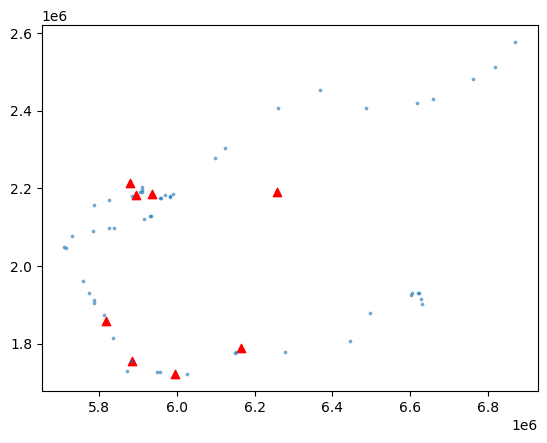

In [9]:
# subsetting
largeAirports=airports[airports['kind']=='large_airport'] #can't use "airports.type"
largeAirports.reset_index(drop=True, inplace=True)

#plotting
base=largeAirports.plot(color='red',marker="^")
seaports_tr_5636.plot(ax=base,alpha=0.5,markersize=3)

In [10]:
seaports_tr_5636.head()

,portName,Country Code,Latitude,Longitude,geometry
0,Delta Terminal,Turkey,36.850000,36.166667,POINT (6623495.877 1929676.349)
1,Aksaz Limani,Turkey,36.833333,28.383333,POINT (5957196.096 1726538.001)
2,Borusan Fertilizer Jetty,Turkey,40.416667,29.100000,POINT (5930590.502 2128846.372)
3,Ambarli,Turkey,40.966667,28.700000,POINT (5883943.506 2179872.619)
4,Antalya Offshore Terminal,Turkey,36.816667,30.600000,POINT (6149848.575 1775024.265)


In [11]:
largeAirports.head()

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,İstanbul Atatürk Airport,large_airport,40.971913,28.823714,163.0,İstanbul Province,"Bakırköy, Istanbul",POINT (5893908.200 2183015.619)
1,Antalya International Airport,large_airport,36.898701,30.800501,177.0,Antalya Province,Antalya,POINT (6164992.575 1788659.087)
2,Istanbul Sabiha Gökçen International Airport,large_airport,40.898602,29.309200,312.0,İstanbul Province,"Pendik, Istanbul",POINT (5935375.646 2185369.046)
3,İstanbul Airport,large_airport,41.261297,28.741951,325.0,İstanbul Province,"Arnavutköy, Istanbul",POINT (5879958.548 2212605.886)
4,Adnan Menderes International Airport,large_airport,38.292400,27.157000,412.0,İzmir Province,İzmir,POINT (5818079.216 1859153.260)


In [12]:
seaports_tr_5636.set_index('portName').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

name,Adnan Menderes International Airport,Antalya International Airport,Dalaman International Airport,Esenboğa International Airport,Istanbul Sabiha Gökçen International Airport,Milas Bodrum International Airport,İstanbul Airport,İstanbul Atatürk Airport
portName,,,,,,,,
Aksaz Limani,192.198629,216.883393,38.686430,551.580291,459.349604,78.079583,492.166260,460.843979
Alanya,467.061310,113.663260,288.291802,410.645684,531.429290,393.814966,588.516257,557.377386
Aliaga,62.531872,398.030270,282.865400,545.125708,309.774535,185.011309,313.279859,290.003066
Ambarli,327.412602,481.701782,470.892350,373.271838,51.725001,423.309033,32.974940,10.448616
Antalya,342.712701,18.191753,164.576601,425.722337,461.541802,266.532133,512.786147,480.307537
Antalya Offshore Terminal,342.269770,20.377662,162.910371,428.093368,463.013473,265.370132,514.118957,481.624771
Ayvalik,119.292884,443.396442,338.004374,549.978733,286.551259,241.801711,279.845790,260.688001
Bandirma,239.896170,449.666823,407.165912,428.159682,130.140699,344.717885,121.633051,101.194139
Bodrum,140.685948,301.190318,125.902994,602.111316,461.676467,32.051013,484.351275,455.289984


In [13]:
distanceMatrixKM_sea_air= seaports_tr_5636.set_index('portName').geometry.apply\
                          (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
                          sort_index(axis=0).sort_index(axis=1)

In [14]:
distanceMatrixKM_sea_air.mean(axis=1).sort_values(ascending=True)

portName
Borusan Fertilizer Jetty       255.511473
Gemlik                         255.520089
Mudanya                        256.066665
Kaba Burnu                     267.397116
Gebze                          267.838519
Haydarpasa                     269.688831
Istanbul                       270.482894
Ambarli                        271.467020
Defterdar Burnu                272.605839
Yarimca                        273.340902
Golcuk Burnu                   274.410164
Derince Burnu                  275.022213
Istinye                        277.007603
Bandirma                       277.821795
Izmit                          278.846662
Erdek                          285.065576
Izmir                          287.161936
Kusadasi                       295.022148
Aliaga                         298.327752
Nemrut Limani Bay              298.874315
Botas Natural Gas Terminal     300.183445
Gulluk                         302.877178
Dikili                         305.646030
Karabiga                 